# Blood tests dataset

### Description 

The lab tests in this dataset of the Human Phenotype Project are based on tests performed to participants in the community as part of their regular medical care at their HMO (Health Maintenance Organization). Participants are asked to upload their blood/urine tests done at their HMOs from previous years. These tests range from the very common CBC and chemistry tests, vitamins levels and other laboratory tests.

### Introduction 

Laboratory (Lab) tests are often used in health care to determine physiological and biochemical states, such as disease, mineral content, pharmaceutical drug effectiveness, and organ function. The lab tests in this data set of the Human Phenotype Project are based on tests performed to participants in the community as part of their regular medical care at their HMO.
Following registration and follow-up calls or visits the participants receive an email asking for and providing instructions on how to upload their lab test results. The participants are provided with a list of recommended tests to upload (specified in the list below) and the recommended time window for some tests (last 3 months or from the previous one year).  Each participant uploads blood tests that were done throughout the years with their HMO. Upon upload, the file is analyzed based on its format, and all readable tests that can be extracted are uploaded to a PostgreSQL database. 

Note that this data is created by the users own volition and the tests are done independent of their visits to the clinical testing  center (CTC). 

#### List of recommended tests for upload:

##### Tests recommended from previous year:
HbA1C%, tota cholesterol, HDL, LDL, Triglycerides.
##### Tests recommended from the last 3 months:
Creatinine, Glucose, CBC (WBC, RBC, Hemoglobin, Hematocrite, Platelets, MCV, MCH, MCHC, RDW, Mean Platelet Volume, Neutrophils%, Lymphocytes%, Monocytes%, Eosinophils%, Basophils%)
##### Tests without time  recommendation:
TSH, CRP, Albumin, Total Protein, Bilirubin, AST-GOT, ALT-GPT, GGT, Alkaline phosphatase, Sodium, Potassium, Chloride, Calcium, Phosphor, Uric acid, B12, Vitamin D, Folic acid and Ferritin.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Every blood/urine test has its own measurement protocol.
* Some blood tests require the participant itself to act differently prior to the test - whether it’s fasting, drinking concentrated glucose/lactose, sampling urine etc.
* The technician has also a large part of the test, by selecting relevant buffers for every one of the tests and have it’s own complete protocol per test.
* And the lab - each HMO would have their own storing protocols, measuring with different machines with different sensitivity thresholds and their own standards (usually aligned between different HMO, but not necessarily).

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file `blood_tests.parquet`.

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/016-blood_tests.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/16)


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pheno_utils import PhenoLoader

In [ ]:
pl = PhenoLoader('blood_tests', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for blood_tests with
67 fields
2 tables: ['blood_tests', 'age_sex']

# Data dictionary

In [ ]:
pl.dict

,folder_id,feature_set,field_string,description_string,relative_location,bulk_dictionary,field_type,data_coding,stability,units,sampling_rate,bulk_file_extension,strata,sexed,array,debut,completed,transformation,list_of_tags,pandas_dtype
tabular_field_name,,,,,,,,,,,,,,,,,,,,
hmo,16,blood_tests,HMO,One of 4 Isreali HMOs,blood_tests/blood_tests.parquet,NaN,Categorical (single),NaN,Accruing,NaN,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,category
collection_date,16,blood_tests,Collection date,Collection date,blood_tests/blood_tests.parquet,NaN,Date,NaN,Accruing,NaN,NaN,NaN,Auxiliary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,datetime64[ns]
bt__albumin_float_value,16,blood_tests,Blood test - Albumin (Numerical),Albumin,blood_tests/blood_tests.parquet,NaN,Continuous,NaN,Accruing,g/dl,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,float
bt__alkaline_phosphatase_float_value,16,blood_tests,Blood test - Alkaline Phosphatase (Numerical),ALKP - Alkaline Phosphatase,blood_tests/blood_tests.parquet,NaN,Continuous,NaN,Accruing,u/l,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,float
bt__alt_float_value,16,blood_tests,Blood test - ALT (Numerical),ALT (GPT) - Alanine Aminotransferease,blood_tests/blood_tests.parquet,NaN,Continuous,NaN,Accruing,u/l,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,float
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
urine__acr_categorical_value,16,blood_tests,Urine test - ACR (Categorical),Urine ACR - Albumin / Creatinine Ratio,blood_tests/blood_tests.parquet,NaN,Categorical (single),NaN,Accruing,NaN,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,category
urine__acr_float_value,16,blood_tests,Urine test - ACR (Numerical),Urine ACR - Albumin / Creatinine Ratio,blood_tests/blood_tests.parquet,NaN,Continuous,NaN,Accruing,mg/g creatinine,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,float
urine__creatinine_float_value,16,blood_tests,Urine test - Creatinine (Numerical),Creatinine,blood_tests/blood_tests.parquet,NaN,Continuous,NaN,Accruing,mg/dl,NaN,NaN,Primary,Both sexes,Single,2015-01-01,NaN,NaN,Blood Tests,float


# Plot histogram and ecdf for AHI at baseline visit


In [4]:
from pheno_utils.basic_plots import hist_ecdf_plots

In [ ]:
col = 'bt__hba1c_float_value'

df = pl[[col, 'age', 'sex', 'collection_date']]\
    .rename(columns={col: col.split('|')[-1]})
col = col.split('|')[-1]

df.head()

,,,,bt__hba1c_float_value,age,sex,collection_date
participant_id,cohort,research_stage,array_index,,,,
5516424321,10k,00_00_visit,0,NaN,54.447672,Female,2011-12-27
5027574288,10k,00_00_visit,0,NaN,54.169913,Male,2019-01-19
7783260382,10k,00_00_visit,0,NaN,45.892093,Male,2015-02-07
1178277844,10k,00_00_visit,0,NaN,44.435100,Female,2019-03-12
1622660825,10k,00_00_visit,0,8.828911,44.621536,Male,2018-12-23


In [6]:
df = df[df['bt__hba1c_float_value'] > 0]

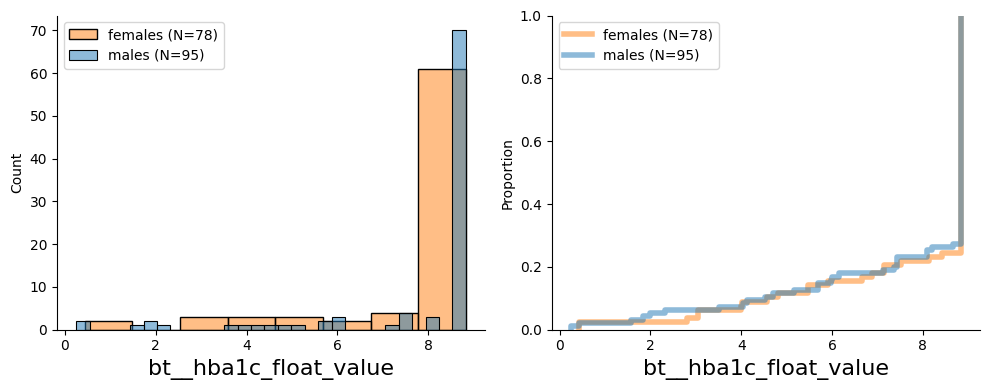

,count,mean,std,min,25%,50%,75%,max
bt__hba1c_float_value,173.0,7.859596,2.050671,0.252675,8.420343,8.828911,8.828911,8.828911


In [ ]:
# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col, 'sex', 'age']), col, gender_col='sex')

# stats
display(df[col].describe().to_frame().T)

# Plot age-sex reference plots

In [8]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

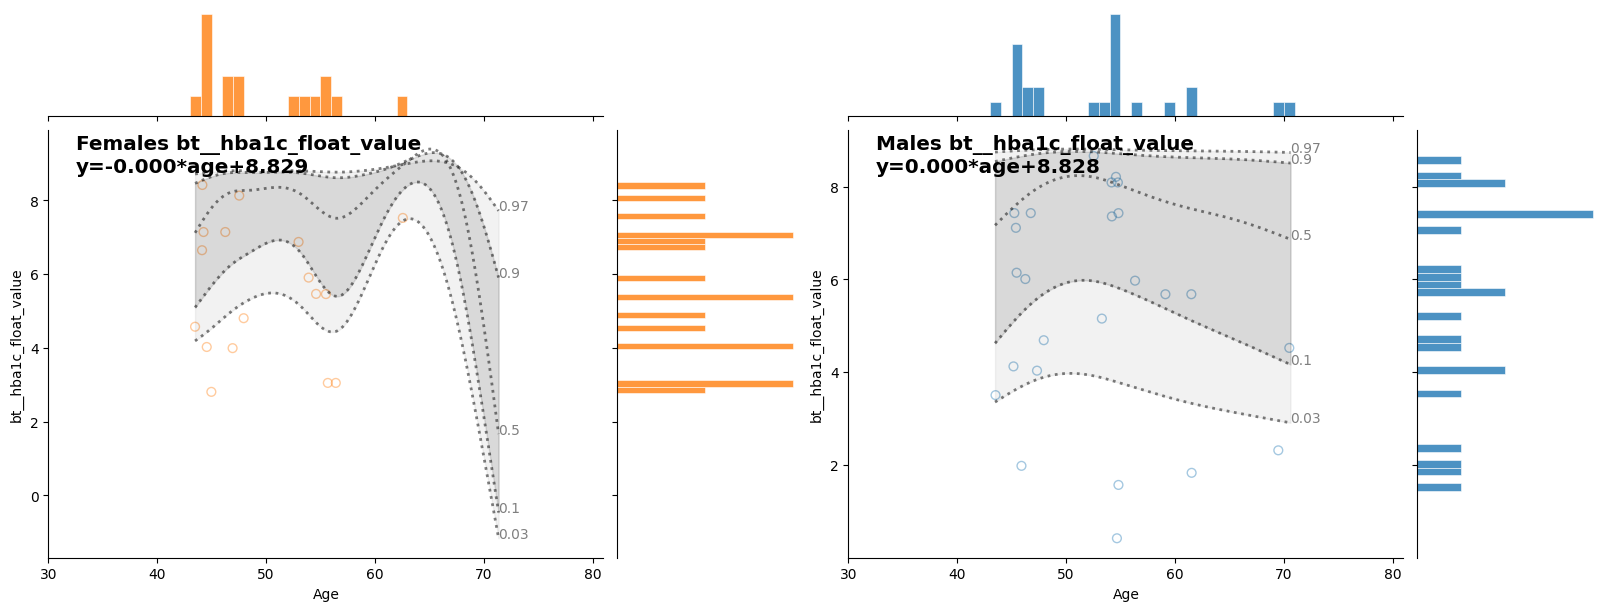

In [9]:
gender_refplots = GenderAgeRefPlot(df.dropna(subset=[col, 'sex', 'age']), col, age_col='age')
gender_refplots.plot()

# Dates plot

In [10]:
from pheno_utils.dates_plots import dates_dist_plot

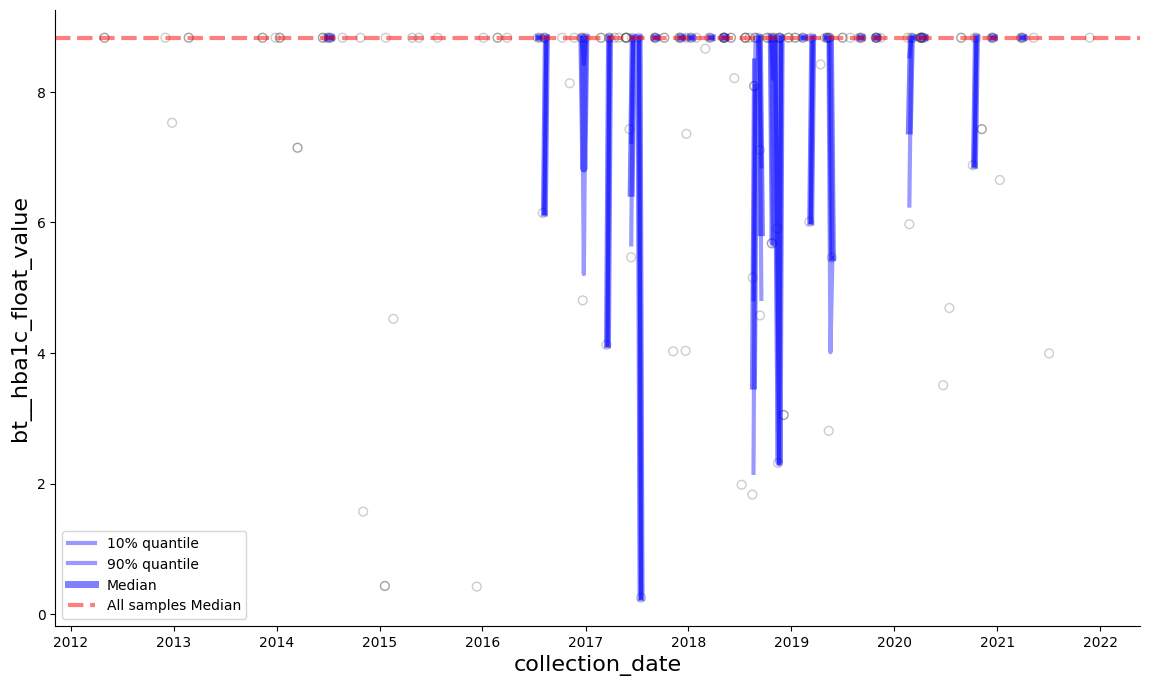

In [11]:
dates_dist_plot(df, col=col, date_col='collection_date')